### 성별
 - 목표 : 여러 얼굴의 특성으로 성별 구분
 - 데이터셋 : gender_classification_v7
 - 피쳐/속성 : 다
 - 타겟/라벨 : gender
 - 학습 방법 : 지도학습 > 분류
 - 알고리즘 : 로지스틱 >>> 데이터 분포가 선형의 형태
 - test_size=0.2,
 - random_state=10

In [61]:
# 모듈로딩
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
import seaborn as sns
from sklearn.linear_model import LogisticRegression
pd.options.display.float_format = '{:.3f}'.format
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc

In [62]:
# 데이터 출력
file = 'gender_classification_v7.csv'
fileDF = pd.read_csv(file)

In [63]:
fileDF.head(5)

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.800,6.100,1,0,1,1,Male
1,0,14.000,5.400,0,0,1,0,Female
2,0,11.800,6.300,1,1,1,1,Male
3,0,14.400,6.100,0,1,1,1,Male
4,1,13.500,5.900,0,0,0,0,Female


In [64]:
fileDF.columns

Index(['long_hair', 'forehead_width_cm', 'forehead_height_cm', 'nose_wide',
       'nose_long', 'lips_thin', 'distance_nose_to_lip_long', 'gender'],
      dtype='object')

In [65]:
fileDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


In [66]:
fileDF['gender'].value_counts()

gender
Female    2501
Male      2500
Name: count, dtype: int64

In [67]:
# 피쳐, 타켓 설정
featureDF = fileDF.drop(['gender'],axis=1)

targetSR = fileDF['gender']

In [68]:
featureDF.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
0,1,11.800,6.100,1,0,1,1
1,0,14.000,5.400,0,0,1,0
2,0,11.800,6.300,1,1,1,1
3,0,14.400,6.100,0,1,1,1
4,1,13.500,5.900,0,0,0,0


In [69]:
targetSR.head()

0      Male
1    Female
2      Male
3      Male
4    Female
Name: gender, dtype: object

In [70]:
targetSR.value_counts()

gender
Female    2501
Male      2500
Name: count, dtype: int64

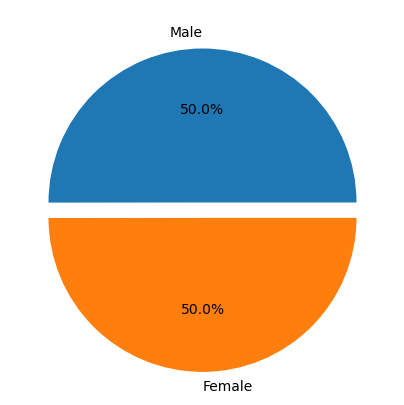

In [71]:
plt.figure(figsize = (5,5))

labels = ["Male","Female"]
explode = [0, 0.1]

plt.pie(targetSR.value_counts(), labels = labels, explode = explode, autopct = '%1.1f%%')

plt.show()

In [72]:
targetSR = targetSR.replace({'Female':0 , 'Male':1 })
targetSR

0       1
1       0
2       1
3       1
4       0
       ..
4996    0
4997    0
4998    0
4999    0
5000    1
Name: gender, Length: 5001, dtype: int64

In [73]:
# 데이터셋 분리
X_train, X_test, y_train, y_test = train_test_split(featureDF,
                                                    targetSR,
                                                    stratify=targetSR,
                                                    test_size=0.2,
                                                    random_state=10)

In [74]:
# 스케일러 모델 인스턴스 
mms = MinMaxScaler()
ss = StandardScaler()

피쳐

'long_hair'    
'forehead_width_cm', > 스케일링 진행    
'forehead_height_cm', > 스케일리 진행    
'nose_wide',    
'nose_long',    
'lips_thin',    
'distance_nose_to_lip_long'    

나머지는 0,1과 나눠서

In [75]:
mm = MinMaxScaler()
ss = StandardScaler()

mm.fit(X_train[['forehead_width_cm', 'forehead_height_cm']])
ss.fit(X_train[['forehead_width_cm', 'forehead_height_cm']])

StandardScaler()

In [76]:
X_train_mm_scaled = mm.transform(X_train[['forehead_width_cm', 'forehead_height_cm']])
X_test_mm_scaled = mm.transform(X_test[['forehead_width_cm', 'forehead_height_cm']])

X_train_ss_scaled = ss.transform(X_train[['forehead_width_cm', 'forehead_height_cm']])
X_test_ss_scaled = ss.transform(X_test[['forehead_width_cm', 'forehead_height_cm']])

In [77]:
X_train_mm = X_train.copy()
X_test_mm = X_test.copy()

X_train_ss = X_train.copy()
X_test_ss = X_test.copy()

In [78]:
X_train_mm[['forehead_width_cm', 'forehead_height_cm']] = X_train_mm_scaled
X_test_mm[['forehead_width_cm', 'forehead_height_cm']] = X_test_mm_scaled

X_train_ss[['forehead_width_cm', 'forehead_height_cm']] = X_train_ss_scaled
X_test_ss[['forehead_width_cm', 'forehead_height_cm']] = X_test_ss_scaled

In [79]:
# MinMaxScaler() 진행
lr = LogisticRegression()
lr.fit(X_train_mm, y_train)

LogisticRegression()

In [80]:
print(f'classes_ : {lr.classes_} , {len(lr.classes_)}개')
print(f'n_features_in_ : {lr.n_features_in_}')
print(f'n_iter_ : {lr.n_iter_}')
print(f'coef_ : {lr.coef_}, {len(lr.coef_[0])}개')
print(f'intercept_ : {lr.intercept_}')

classes_ : [0 1] , 2개
n_features_in_ : 7
n_iter_ : [20]
coef_ : [[-0.40189014  2.55792343  1.81077846  3.74627527  3.33642644  3.49059575
   3.5653981 ]], 7개
intercept_ : [-8.47531648]


In [81]:
train_score = lr.score(X_train_mm, y_train)
test_score = lr.score(X_test_mm, y_test)
print(f'train_score : {train_score},   test_score : {test_score}')

train_score : 0.96925,   test_score : 0.964035964035964


In [82]:
y_pred = lr.predict(X_train_mm)

print("Confusion Matrix:")
print(confusion_matrix(y_train, y_pred))
print("\nClassification Report:")
print(classification_report(y_train, y_pred))


Confusion Matrix:
[[1941   59]
 [  64 1936]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2000
           1       0.97      0.97      0.97      2000

    accuracy                           0.97      4000
   macro avg       0.97      0.97      0.97      4000
weighted avg       0.97      0.97      0.97      4000



In [88]:
# roc 커브, auc 계산

y_probs = lr.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)
roc_auc, fpr, tpr, y_probs

(0.7974051896207585,
 array([0.        , 0.40518962, 0.53093812, 0.6007984 , 0.64271457,
        0.66666667, 0.69461078, 0.71856287, 0.72255489, 0.73652695,
        0.75449102, 0.76047904, 0.7744511 , 0.79241517, 0.8003992 ,
        0.80638723, 0.81037924, 0.82035928, 0.82634731, 0.83033932,
        0.83233533, 0.84031936, 0.84231537, 0.84830339, 0.85628743,
        0.85828343, 0.86227545, 0.86826347, 0.87225549, 0.8742515 ,
        0.88023952, 0.88423154, 0.88622754, 0.89021956, 0.90419162,
        0.91017964, 0.91417166, 0.91616766, 0.92015968, 0.9241517 ,
        0.93213573, 0.94610778, 0.9500998 , 0.95608782, 0.96007984,
        0.97804391, 0.98203593, 1.        ]),
 array([0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 array([1., 1., 1., ..., 1., 1., 1.]))

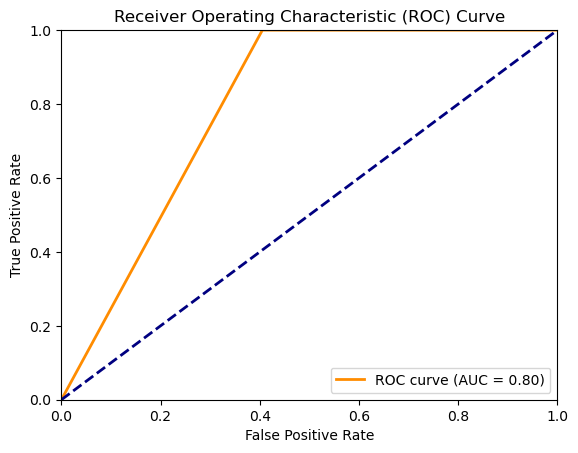

In [84]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [101]:
# GridSearchCV()사용

params = {'C': [0.1,1,2,5,10], 
        'max_iter' : [50, 100, 150, 200, 250, 300],
        'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']}

In [102]:
gscv = GridSearchCV(LogisticRegression(),
                    param_grid=params,
                    return_train_score=True, refit=True)
gscv.fit(X_train, y_train)

c:\Users\KDP-23\anaconda3\envs\ML_38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\KDP-23\anaconda3\envs\ML_38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\KDP-23\anaconda3\envs\ML_38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\KDP-23\anaconda3\envs\ML_38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\KDP-23\anaconda3\envs\ML_38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\KDP-23\anaconda3\envs\ML_38\lib\site-pack

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 2, 5, 10], 'max_iter': [100, 200, 300],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             return_train_score=True)

In [103]:
print(f'[ gscv.best_params_ ] {gscv.best_params_}')
print(f'[ gscv.best_score_ ] {gscv.best_score_}')
print(f'[ gscv.best_estimator_ ] {gscv.best_estimator_}')

[ gscv.best_params_ ] {'C': 0.1, 'max_iter': 100, 'solver': 'lbfgs'}
[ gscv.best_score_ ] 0.969
[ gscv.best_estimator_ ] LogisticRegression(C=0.1)


-------------------------------------------------

In [ ]:
### StandardScaler로 진행

lr_ss = LogisticRegression()
lr_ss.fit(X_train_ss, y_train)

LogisticRegression()

In [ ]:
print(f'classes_ : {lr_ss.classes_} , {len(lr_ss.classes_)}개')
print(f'n_features_in_ : {lr_ss.n_features_in_}')
print(f'n_iter_ : {lr_ss.n_iter_}')
print(f'coef_ : {lr_ss.coef_}, {len(lr_ss.coef_[0])}개')
print(f'intercept_ : {lr_ss.intercept_}')

classes_ : [0 1] , 2개
n_features_in_ : 7
n_iter_ : [19]
coef_ : [[-0.41246209  0.8027727   0.5690334   3.7881972   3.37165058  3.5361731
   3.59833491]], 7개
intercept_ : [-6.66189479]


In [ ]:
train_score_ss = lr_ss.score(X_train_ss, y_train)
test_score_ss = lr_ss.score(X_test_ss, y_test)
print(f'train_score : {train_score_ss},   test_score : {test_score_ss}')

train_score : 0.9695,   test_score : 0.964035964035964


In [ ]:
y_pred = lr_ss.predict(X_train_ss)

print("Confusion Matrix:")
print(confusion_matrix(y_train, y_pred))
print("\nClassification Report:")
print(classification_report(y_train, y_pred))


Confusion Matrix:
[[1942   58]
 [  64 1936]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2000
           1       0.97      0.97      0.97      2000

    accuracy                           0.97      4000
   macro avg       0.97      0.97      0.97      4000
weighted avg       0.97      0.97      0.97      4000



roc 커브 그려보고
auc 계산

하이퍼 파라미터 그리드서치

>>> 최적의 변수 , 다 살펴보고 정밀도 민감도 젤 좋은 모델을 뽑는 과정
